# Name: Geethika Bedadhala
# MS in Data Science University at Buffalo

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [35]:
df=pd.read_csv('social_data Data.csv')
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [4]:
#enagagement rate is given by total engagements/Total Emp
df['Engagement_rate']=(df['Total Engagements']/df['Total Impressions'])*100
df['Engagement_rate'].mean()

40.49262176120076

The Enagagement_rate is 40.5%

In [5]:
#likelihood that we can achieve a 15% engagement rate
num_trials = len(df)
success_count = df[df['Engagement_rate'] >= 15].count()['Engagement_rate']
likelihood = (success_count / num_trials) * 100
likelihood

6.4961195745903995

The likelihood that we can achieve a 15% engagement rate is 6.5%

# 2. Does day of the week and time of posting affect engagement rates?

In [6]:
#removing the outliers
df=df[df['Engagement_rate'] <= 100]

<Figure size 1200x600 with 0 Axes>

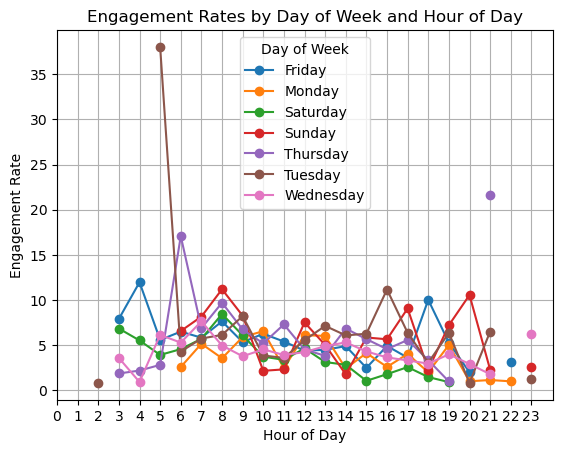

In [14]:
import warnings
warnings.filterwarnings("ignore")

# Convert the 'Published Date' column to datetime type
df['Published Date'] = pd.to_datetime(df['Published Date'])

# Extract the day of the week and hour of the day from the 'Published Date' column
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour of Day'] = df['Published Date'].dt.hour

# Calculate the average engagement rate for each day of the week and hour of the day
engagement_rates = df.groupby(['Day of Week', 'Hour of Day'])['Engagement_rate'].mean()

# Reshape the data to have 'Day of Week' as columns and 'Hour of Day' as rows
engagement_rates = engagement_rates.unstack('Day of Week')

# Plot the engagement rates
plt.figure(figsize=(12, 6))
engagement_rates.plot(marker='o')
plt.title('Engagement Rates by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Engagement Rate')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.grid(True)
plt.show()

From the above graph we can see that there is more engagement rate after mid of the day (from 4 PM to 12 AM)
and on Tuesdays, Fridays, Sundays the engagement rate is more

# 3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

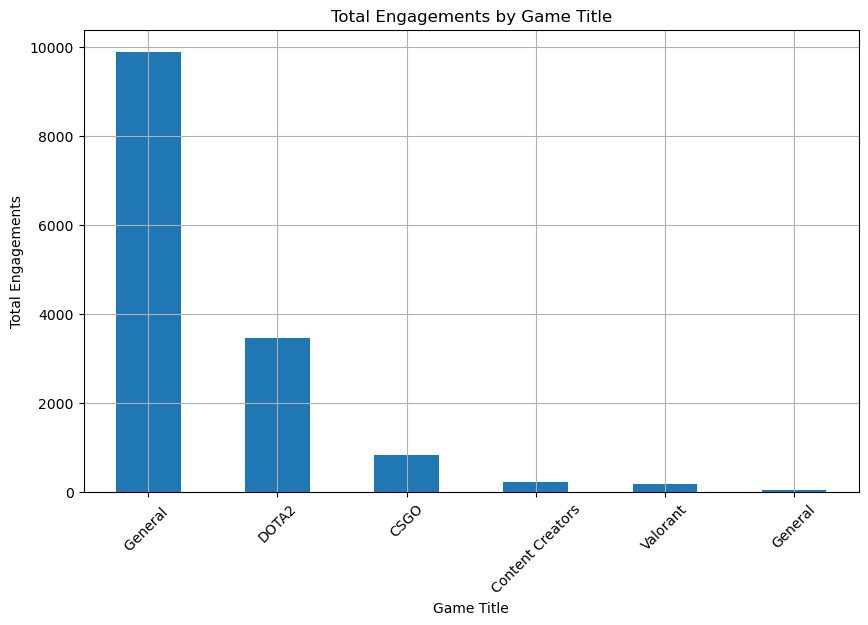

In [22]:
# Calculate the total engagements for each game title
engagements_by_game = df.groupby('Account')['Engagement_rate'].sum()

# Sort the games based on total engagements in descending order
sorted_games = engagements_by_game.sort_values(ascending=False)

# Plot the total engagements for each game title
plt.figure(figsize=(10, 6))
sorted_games.plot(kind='bar')
plt.title('Total Engagements by Game Title')
plt.xlabel('Game Title')
plt.ylabel('Total Engagements')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

After General DOTA2 and CSGO performed well in terms of engagement rates we can focus more on valorant

# 4. What media type performs the best?

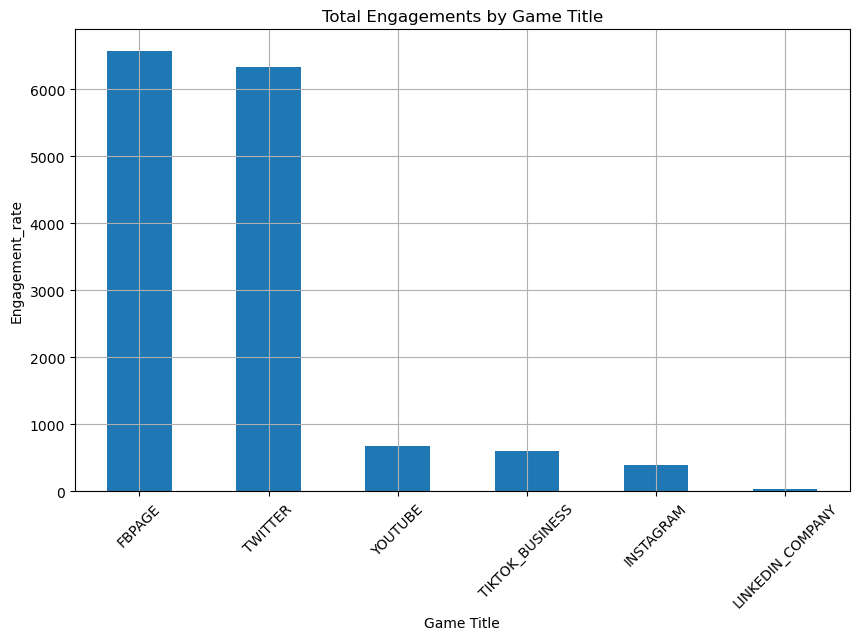

In [26]:
# Calculate the total engagements for each game title
engagements_by_game = df.groupby('Account Type')['Engagement_rate'].sum()

# Sort the games based on total engagements in descending order
sorted_games = engagements_by_game.sort_values(ascending=False)

# Plot the total engagements for each game title
plt.figure(figsize=(10, 6))
sorted_games.plot(kind='bar')
plt.title('Total Engagements by Game Title')
plt.xlabel('Game Title')
plt.ylabel('Engagement_rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Sursprisingly FBPAGE performed best followed by Twitter and YOUTUBE

# 5. What is our best performing campaign?

In [10]:
# Group the data by 'Campaign Name' and calculate the sum of 'Total Engagements' for each campaign
campaign_group = df.groupby('Campaign Name')['Total Engagements'].sum()

# Sort the campaigns based on total engagements in descending order
sorted_campaigns = campaign_group.sort_values(ascending=False)

# Get the best performing campaign (top row after sorting)
best_campaign = sorted_campaigns.iloc[0]

# Get the name of the best performing campaign
best_campaign_name = sorted_campaigns.index[0]

# Print the best performing campaign details
print("Best Performing Campaign:")
print("Campaign Name:", best_campaign_name)
print("Total Engagements:", best_campaign)


Best Performing Campaign:
Campaign Name: Community Engagement 
Total Engagements: 2044767


Community Engagement is the best performing campaign

# 6. Define out  posting strategy for our social channels based on your discoveries.

In [29]:
# Group by campaign name and calculate sum of impressions and engagements
grouped_data = df.groupby('Account Type').agg({
    'Total Impressions': 'sum',
    'Total Engagements': 'sum',
    'Engagement_rate': 'sum'
})

# Print the grouped data
print(grouped_data)


                  Total Impressions  Total Engagements  Engagement_rate
Account Type                                                           
FBPAGE                     14472842            2572524      6566.768703
INSTAGRAM                   3574059              84087       392.059880
LINKEDIN_COMPANY              42801                849        39.490404
TIKTOK_BUSINESS              344159              18865       600.793092
TWITTER                    19500596             604559      6338.788001
YOUTUBE                      238403              10328       670.753770


We should post more on FBPAGE and TWITTER as engagement rate is good. and check why we are getting less engagement rate on other account types 

# 7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?


In [32]:
groups = df.groupby(['Account Type','Account'])['Engagement_rate'].sum()
groups

Account Type      Account         
FBPAGE            General             6566.768703
INSTAGRAM         General              392.059880
LINKEDIN_COMPANY  General               39.490404
TIKTOK_BUSINESS   General              600.793092
TWITTER           CSGO                 818.247578
                  DOTA2               3426.472311
                  General             2094.068112
YOUTUBE           Content Creators     216.008520
                  DOTA2                 25.058179
                  General              248.195407
                  Valorant             181.491664
Name: Engagement_rate, dtype: float64

CSGO is working is doing wekk in TWITTER we should expand in FBPAGE.
For General FBPAGE is doing well and we can try to expand in other Accountypes like YOUTUBE.
For DOTA2 Twitter is doing well and may be youtube is not doing so great. We can try FBPAGE, TIKTOK_BUSINESS
For Valorant youtube is doing fine but we can expand in FBPAGE